# anaysis significant electrodes both in covert task and overt task

In [1]:
import numpy as np
from scipy import stats
import os
import scipy.io as scio
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

bands_list = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, 70),
    'high gamma':(70,150),
    'else2':(150,min(400/2, 300))
}
HS_list = [45,47,48,50,54,71,76,78,73]
freq_list = [400]
mpl.rcParams['font.size'] =10

In [6]:
task_names = ['covert', 'overt']
task_sig = {task:{} for task in task_names}
for task in task_names:
    task_all_sigelecs = np.load(os.path.join(f'/public/DATA/covert_reading/t-test_results', f'{task}_all_sigelecs.npy'), allow_pickle=True).item()
    print(task_all_sigelecs)
    task_sig[task] = task_all_sigelecs[task]

covert_overt_sigelecs = {f'HS{HS}':{} for HS in HS_list}
for HS in HS_list:
    for band in bands_list:
        covert_sig_elecs, overt_sig_elecs = task_sig['covert'], task_sig['overt']
        covert_elecs_list, overt_elecs_list = covert_sig_elecs[f'HS{HS}'][band], overt_sig_elecs[f'HS{HS}'][band]
        covert_set, overt_set = set(covert_elecs_list), set(overt_elecs_list)
        covert_overt_sigelecs[f'HS{HS}'][band] = list(covert_set | overt_set)

task_sigelecs = {'covert_overt': covert_overt_sigelecs}
print(task_sigelecs)
save_base_path = '/public/DATA/covert_reading/t-test_results/'
np.save(os.path.join(save_base_path, 'sig_elecs_two_tasks.npy'), task_sigelecs)

{'covert': {'HS45': {'delta': [], 'theta': [], 'alpha': [], 'beta': [50, 127, 133, 134, 148, 164], 'gamma': [76, 107, 126], 'high gamma': [32], 'else2': []}, 'HS47': {'delta': [], 'theta': [], 'alpha': [], 'beta': [124, 207, 223, 227], 'gamma': [13, 15, 44, 46, 47, 92, 127, 200, 223], 'high gamma': [26, 210], 'else2': []}, 'HS48': {'delta': [], 'theta': [27], 'alpha': [60, 200, 216, 253], 'beta': [206, 238], 'gamma': [], 'high gamma': [128], 'else2': []}, 'HS50': {'delta': [], 'theta': [], 'alpha': [87], 'beta': [4, 71, 101], 'gamma': [8, 35, 38, 46, 51, 52, 55, 60, 70, 73, 74, 83, 88, 90, 99, 106, 115, 133, 148, 241], 'high gamma': [24], 'else2': []}, 'HS54': {'delta': [], 'theta': [193, 209], 'alpha': [135, 174, 237], 'beta': [1, 18, 22, 33, 34, 128, 131, 132], 'gamma': [66, 72, 73, 82, 86, 87, 98, 121, 143, 191, 207, 221, 236, 237], 'high gamma': [56, 76, 85, 89, 91, 105, 118, 122], 'else2': []}, 'HS71': {'delta': [], 'theta': [], 'alpha': [174], 'beta': [], 'gamma': [], 'high gamma

# Plot significant electrodes for two tasks

In [11]:
def load_all_subjects_sigelecs(HS_list, band, task_all_sigelecs):
    all_coords, all_HS, all_anatomy, all_elecs = [], [], [], []
    path = '/public/DATA/overt_reading/'
    for HS in HS_list:
        subject_str = f"HS{HS}"
        anatomy = scio.loadmat(f"/public/DATA/covert_reading/elecs/warped/HS{int(HS)}_elecs_all_warped.mat")['anatomy']

        band_sigelecs = task_all_sigelecs[f"HS{HS}"][band]
        # Load 3D electrode coordinates in MNI space
        path = '/public/DATA/covert_reading/'
        coords = scio.loadmat(path + f"/elecs/Brain2D/{subject_str}_elec_pos2D.mat")['elecmatrix']
        if len(band_sigelecs) == 0 :
            continue
        for i, sigelecs in enumerate(band_sigelecs):
            all_coords.append(coords[sigelecs])  # Append each electrode's coordinates
            all_HS.append(HS)        # Append each electrode's HS
            all_anatomy.append(anatomy[sigelecs][3][0])
            all_elecs.append(sigelecs)
            
    return np.array(all_coords), np.array(all_HS), np.array(all_anatomy), np.array(all_elecs)

def plot_brain_surface_with_sigelecs(all_coords, all_HS, all_anatomy, all_elecs, band, task):
    # Load 2D brain image
    path = '/public/DATA/covert_reading/'
    img = mpimg.imread(path + "/elecs/MNI.png")
    marker_type = {}
    marker_type["45"] = "D"
    marker_type["47"] = "*"
    marker_type["48"] = "s"
    marker_type["50"] = "P"
    marker_type["54"] = "o"
    marker_type["71"] = "v"
    marker_type["76"] = "^"
    marker_type["73"] = "X"
    marker_type["78"] = "p"

    color_set_region = {'superiorfrontal': 'grey',
             'superiortemporal': 'purple',
             'inferiorparietal': 'skyblue',
             'rostralmiddlefrontal': 'black',
             'parstriangularis': 'darkgreen',
             'superiorparietal': 'orange',
             'postcentral': 'red',
             'parsopercularis': 'gold',
             'middletemporal': 'greenyellow',
             'inferiortemporal': 'pink',
             'parsorbitalis': 'olive',
             'supramarginal': 'green',
             'lateraloccipital': 'navy',
             'bankssts': 'rosybrown',
             'precentral': 'blue',
             'caudalmiddlefrontal': 'slategrey'}
   
    plt.subplots(figsize=(15,15))

    plt.imshow(img)
    for i, elec in enumerate(all_elecs):
        plt.scatter(all_coords[i, 0], all_coords[i, 1], c=color_set_region[all_anatomy[i]], marker=marker_type[str(all_HS[i])], alpha=0.7)
    # plt.scatter(all_coords[:, 0], all_coords[:, 1], alpha=0.7, )
    # 创建虚拟点用于图例
    legend_handles = []
    for region, color in color_set_region.items():
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=region))
    
    # 添加图例
    plt.legend(handles=legend_handles, title="Brain Regions", loc='upper right', fontsize='small', title_fontsize='medium')

    plt.title(f'{task} Significant Electrodes {band} - number {len(all_elecs)}')
    plt.axis('off')
    plt.show()
    

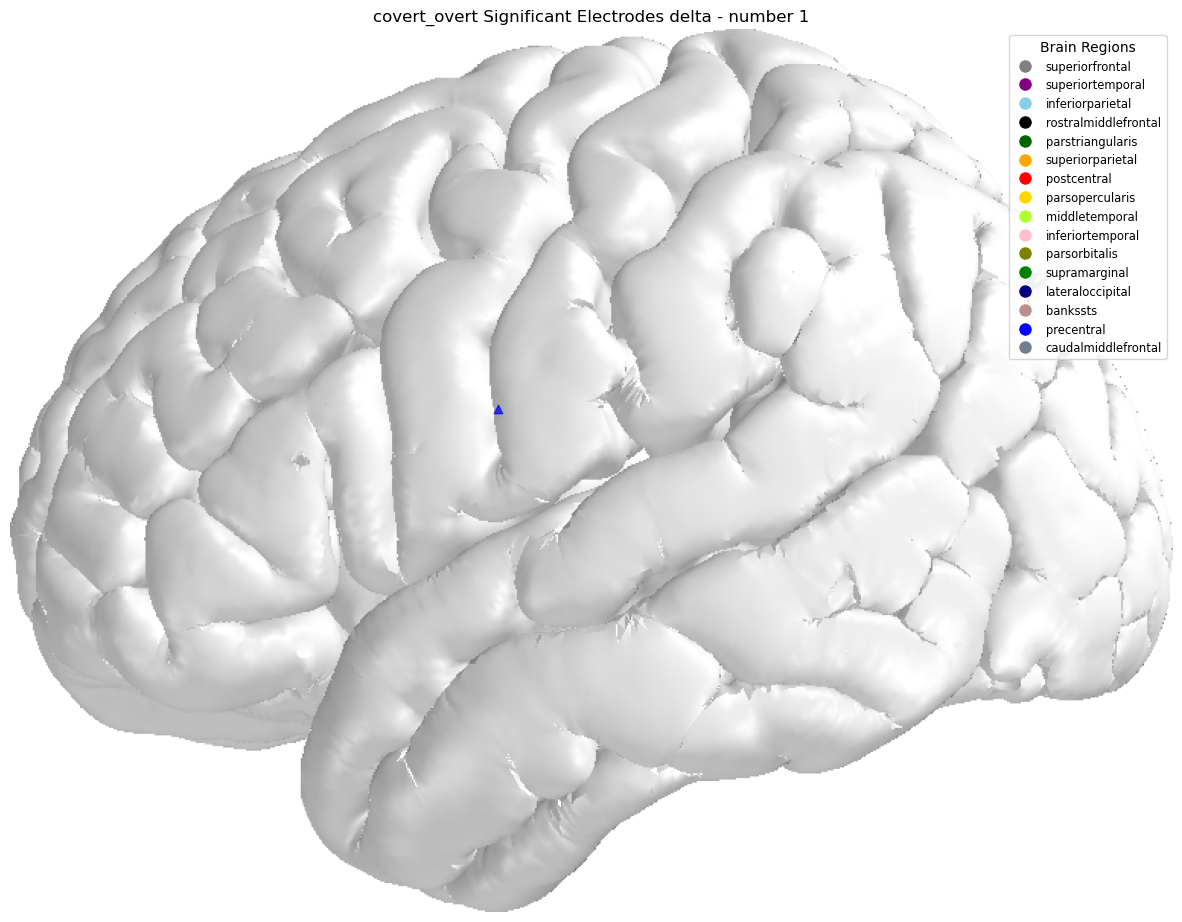

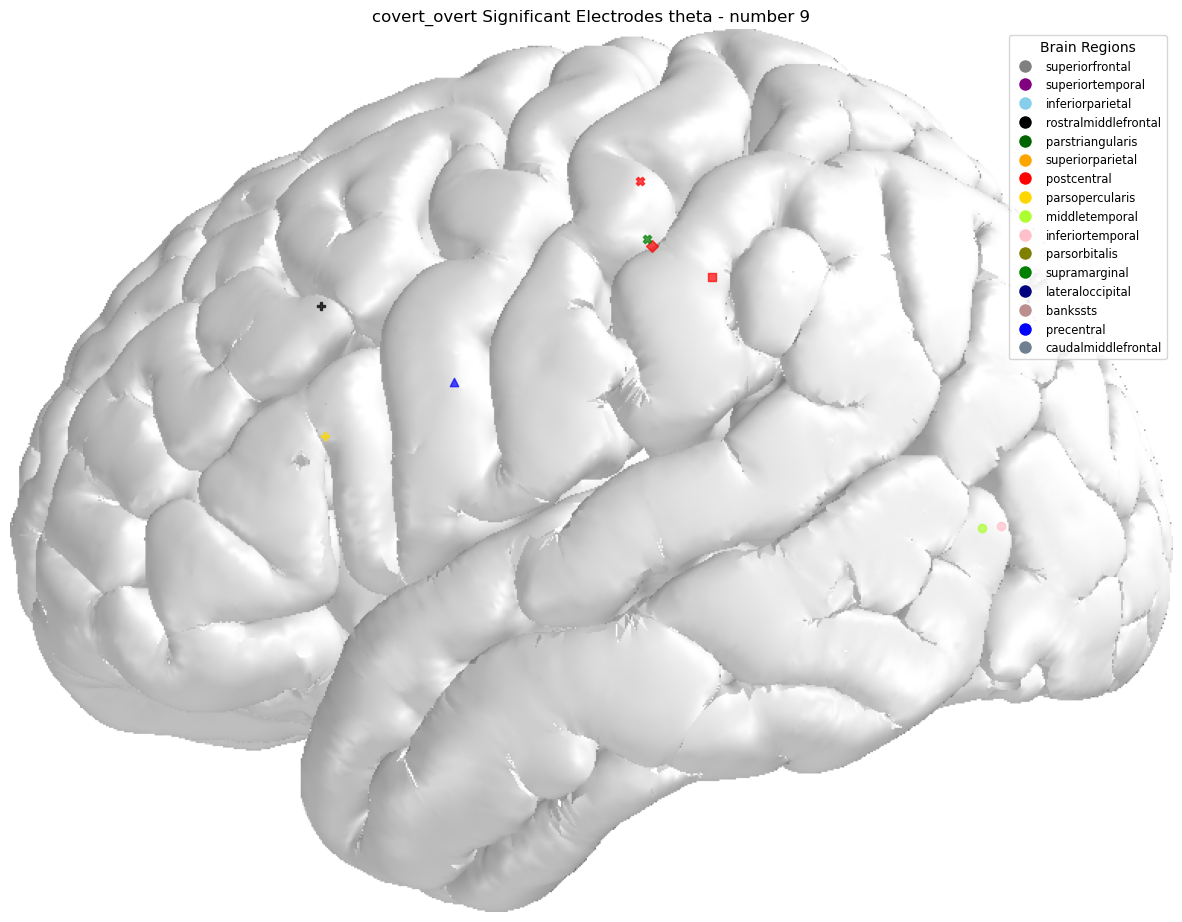

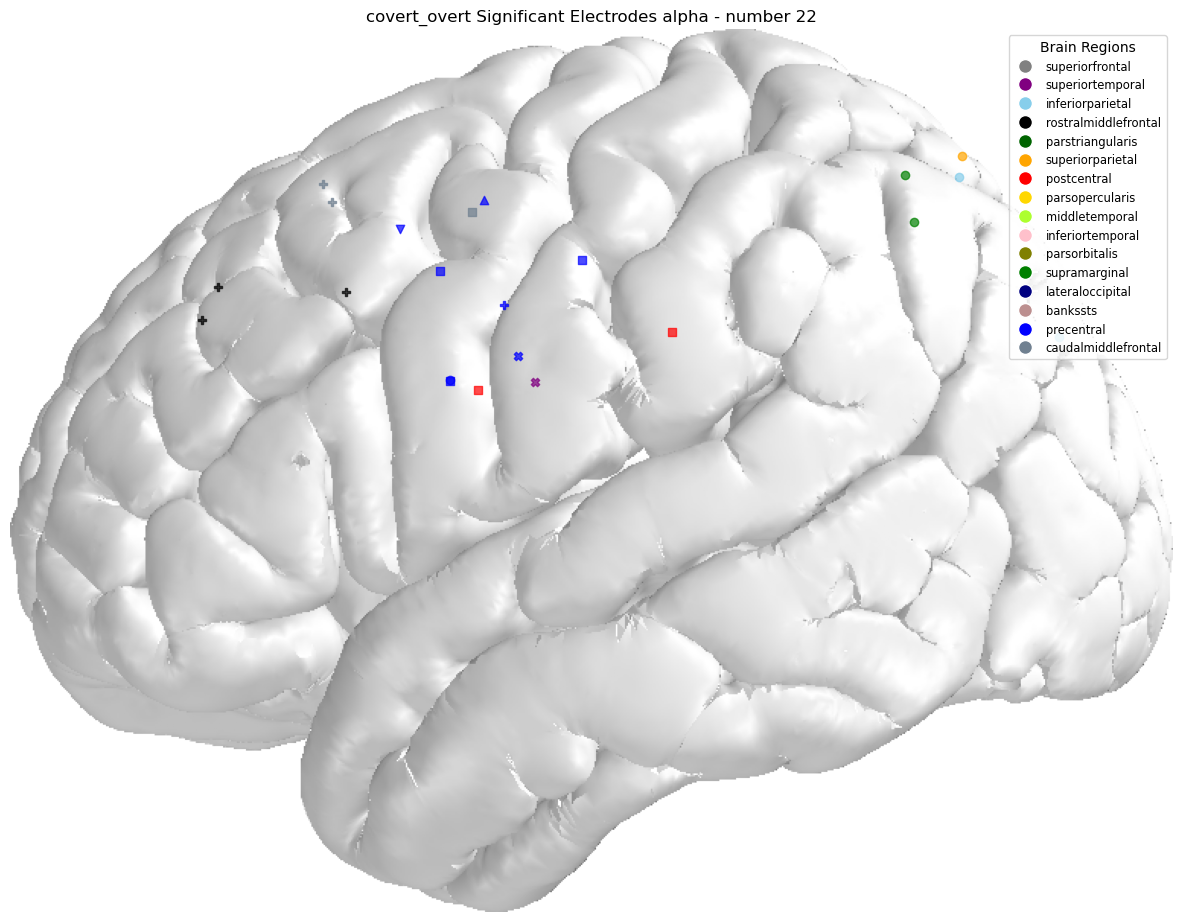

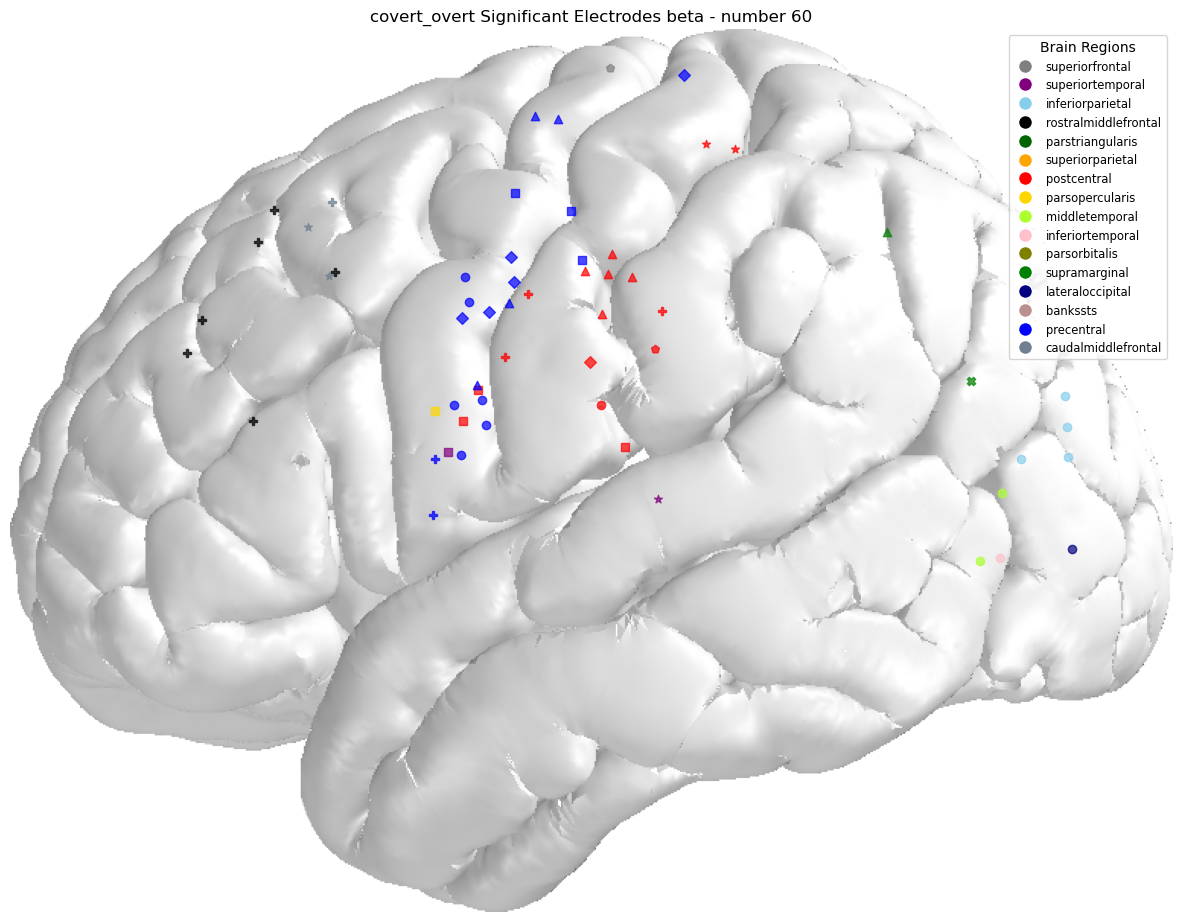

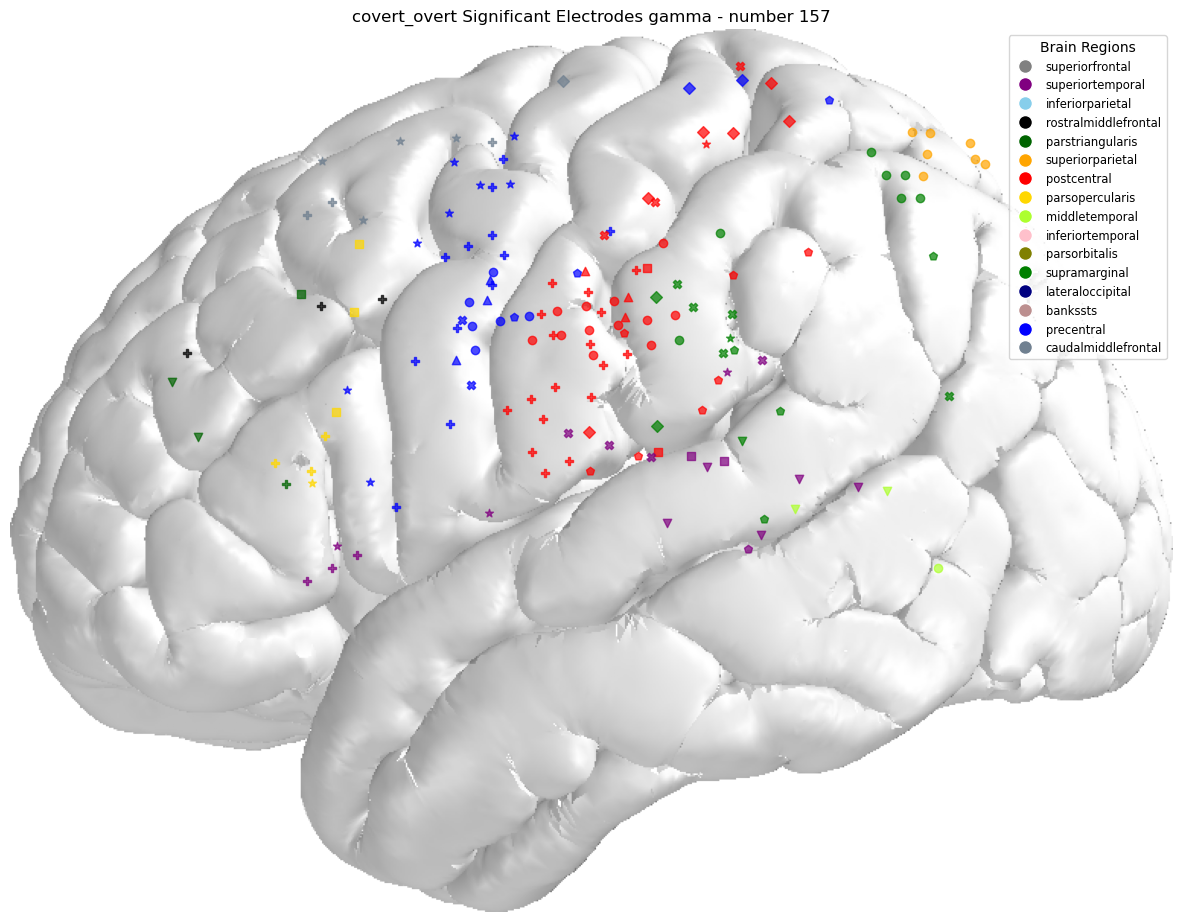

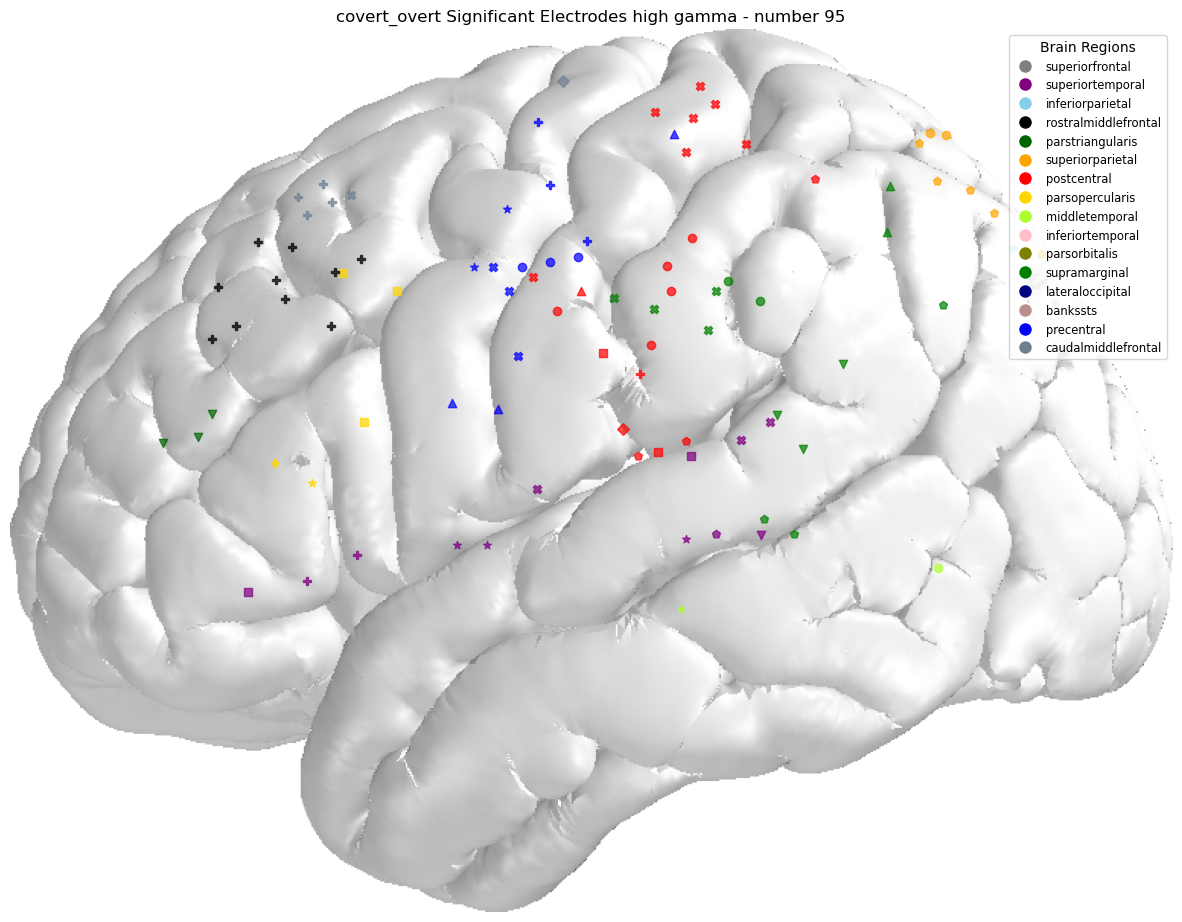

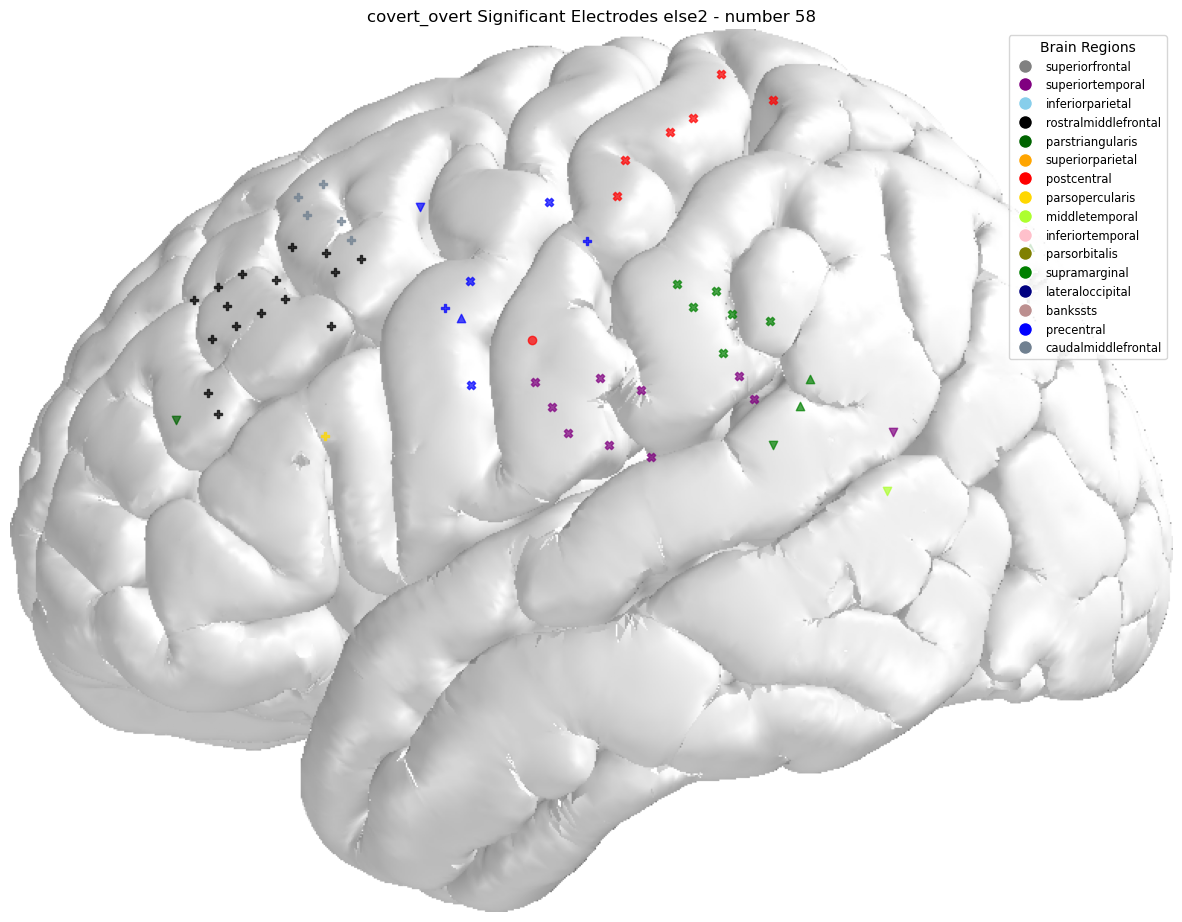

In [12]:
sig_regions = {}
for band in bands_list:
    for task, task_all_sigelecs in task_sigelecs.items():
        all_coords, all_HS, all_anatomy, all_elecs = load_all_subjects_sigelecs(HS_list, band, task_all_sigelecs)
        sig_regions[task] = all_anatomy
        plot_brain_surface_with_sigelecs(all_coords, all_HS, all_anatomy, all_elecs, band, task)

# aggregate ration of significant electrodes

In [15]:
def Count_electrodes_of_regions(HS_list, freq_list, band, task_all_sigelecs):
    elec_region, sigelec_region = {}, {}
    for HS in HS_list:
        band_sigelec = task_all_sigelecs[f'HS{HS}'][band]
        anatomy = scio.loadmat(f"/public/DATA/covert_reading/elecs/warped/HS{int(HS)}_elecs_all_warped.mat")['anatomy']

        for freq in freq_list:
            for elec in range(256):
                region = anatomy[elec][3][0]
                if region not in elec_region:
                    elec_region[region] = 0
                elec_region[region] += 1
                if elec in band_sigelec:
                    if region not in sigelec_region:
                        sigelec_region[region] = 0
                    sigelec_region[region] += 1
    return elec_region, sigelec_region


x = [3,3,3,2,2,2,1,1,1,0,0,0]
y = [1,2,3,1,2,3,1,2,3,1,2,3]
i = 0
region_abbr = {'superiorfrontal': 'SFG',
             'superiortemporal': 'STG',
             'inferiorparietal': 'AG',
             'rostralmiddlefrontal': 'MFG',
             'parstriangularis': 'pTri',
             'superiorparietal': 'SPL',
             'postcentral': 'PCG',
             'parsopercularis': 'pOp',
             'middletemporal': 'MTG',
             'inferiortemporal': 'IT',
             'supramarginal': 'SMG',
             'lateraloccipital': 'Lo',
             'precentral': 'PC',
             'caudalmiddlefrontal': 'pMFG'}

color_set_region = {'superiorfrontal': 'grey',
             'superiortemporal': 'purple',
             'inferiorparietal': 'skyblue',
             'rostralmiddlefrontal': 'black',
             'parstriangularis': 'darkgreen',
             'superiorparietal': 'orange',
             'postcentral': 'red',
             'parsopercularis': 'gold',
             'middletemporal': 'greenyellow',
             'inferiortemporal': 'pink',
             'parsorbitalis': 'olive',
             'supramarginal': 'green',
             'lateraloccipital': 'navy',
             'bankssts': 'rosybrown',
             'precentral': 'blue',
             'caudalmiddlefrontal': 'slategrey'}


from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# def plot_retion_regions(task):
#     region_all = Count_electrodes_of_regions(HS_list, freq_list)
#     all_anatomy = sig_regions[task]
#     region_all_fre = Counter(region_all)
#     region_frequency = Counter(all_anatomy)
#     print(region_all_fre)
#     print(region_frequency)
#     values = []
#     names = []
#     rate = []
#     all_values = []
#     colors = []
#     for region_name in region_frequency:
#         names.append(region_abbr[region_name])
#         values.append(region_frequency[region_name])
#         rate.append(region_frequency[region_name]/region_all_fre[region_name])
#         all_values.append(region_all_fre[region_name])
#         colors.append(color_set_region[region_name])

#     # 创建柱状图
#     plt.bar(names, values,color=colors)
#     for i, v in enumerate(values):
#         plt.text(i, v + 0.1, f"{100*rate[i]:.2f}%", ha='center')
#     plt.ylim(0, 50)
#     # 添加标题和标签
#     plt.title(f'significant electrodes numbers & significant ratios of {task}')
#     plt.xlabel('regions')
#     plt.ylabel('significant electrodes numbers')
#     plt.show()

def plot_retion_regions(task, task_all_sigelecs, band):
    elec_region, sigelec_region = Count_electrodes_of_regions(HS_list, freq_list, band, task_all_sigelecs)
    # all_anatomy = sig_regions[task]
    region_all_fre = Counter(elec_region)
    region_frequency = Counter(sigelec_region)
    print(region_all_fre)
    print(region_frequency)
    values = []
    names = []
    rate = []
    all_values = []
    colors = []
    for region_name in region_frequency:
        names.append(region_abbr[region_name])
        values.append(region_frequency[region_name])
        rate.append(region_frequency[region_name]/region_all_fre[region_name])
        all_values.append(region_all_fre[region_name])
        colors.append(color_set_region[region_name])

    # 创建柱状图
    plt.bar(names, values,color=colors)
    for i, v in enumerate(values):
        plt.text(i, v + 0.1, f"{100*rate[i]:.2f}%", ha='center')
    plt.ylim(0, 50)
    # 添加标题和标签
    plt.title(f'significant electrodes numbers & significant ratios of {task} - {band}')
    plt.xlabel('regions')
    plt.ylabel('significant electrodes numbers')
    plt.show()

# 绘制热图
def plot_task_heatmap(task, task_all_sigelecs, HS_list, bands_list):
    # 准备存储区域显著比的数据
    heatmap_data = pd.DataFrame(index=region_abbr.keys(), columns=bands_list, dtype=float)

    # 遍历频段，填充数据
    for band in bands_list:
        elec_region, sigelec_region = Count_electrodes_of_regions(HS_list, freq_list, band, task_all_sigelecs)
        print(elec_region)
        print(sigelec_region)
        for region in region_abbr.keys():
            total_elec = elec_region.get(region, 0)
            sig_elec = sigelec_region.get(region, 0)
            # print(total_elec, sig_elec)
            heatmap_data.loc[region, band] = (sig_elec / total_elec) * 100 if total_elec > 0 else 0.0

    # 绘制热图
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        heatmap_data.rename(index=region_abbr),  # 用缩写替换全称
        cmap='viridis',
        annot=True,
        fmt=".2f",
        cbar_kws={'label': 'Significant Ratio'},
        linewidths=0.5,
        linecolor='gray'
    )
    plt.title(f"Significant Electrodes Ratios for Task: {task}")
    plt.xlabel("Frequency Bands")
    plt.ylabel("Brain Regions")
    plt.tight_layout()
    plt.show()

{'supramarginal': 457, 'postcentral': 419, 'precentral': 434, 'caudalmiddlefrontal': 191, 'parsopercularis': 126, 'rostralmiddlefrontal': 133, 'superiorfrontal': 7, 'superiortemporal': 224, 'parstriangularis': 71, 'middletemporal': 69, 'inferiorparietal': 96, 'parsorbitalis': 5, 'lateraloccipital': 9, 'superiorparietal': 32, 'inferiortemporal': 8, 'bankssts': 23}
{'precentral': 1}
{'supramarginal': 457, 'postcentral': 419, 'precentral': 434, 'caudalmiddlefrontal': 191, 'parsopercularis': 126, 'rostralmiddlefrontal': 133, 'superiorfrontal': 7, 'superiortemporal': 224, 'parstriangularis': 71, 'middletemporal': 69, 'inferiorparietal': 96, 'parsorbitalis': 5, 'lateraloccipital': 9, 'superiorparietal': 32, 'inferiortemporal': 8, 'bankssts': 23}
{'postcentral': 3, 'parsopercularis': 1, 'rostralmiddlefrontal': 1, 'inferiortemporal': 1, 'middletemporal': 1, 'precentral': 1, 'supramarginal': 1}
{'supramarginal': 457, 'postcentral': 419, 'precentral': 434, 'caudalmiddlefrontal': 191, 'parsopercu

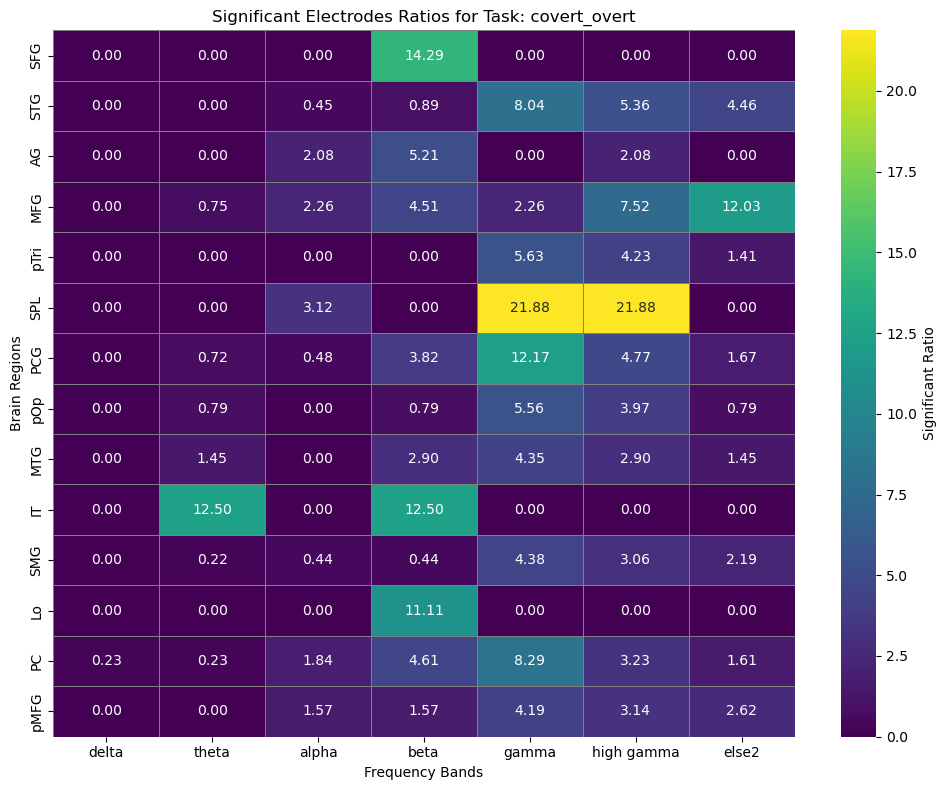

In [16]:
task_all_sigelecs = np.load(f'/public/DATA/covert_reading/t-test_results/sig_elecs_two_tasks.npy', allow_pickle=True).item()

for task in task_sigelecs.keys():
    # plot_retion_regions(task)
    # print(task)
    # task_all_sigelecs = np.load(os.path.join(f'/public/DATA/overt_reading/t-test_results', f'{task}_all_sigelecs.npy'), allow_pickle=True).item()
    # for band in bands_list:
        # plot_retion_regions(task, task_all_sigelecs[task], band)
    plot_task_heatmap(task, task_all_sigelecs[task], HS_list, bands_list)
# plot_retion_regions('Read')